In [1]:
from astropy.io import fits
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
f = open("GetTOPS-main/test/multi:0_0.7_0.24_0.05986542681235738.dat", "r")
topt=[]
topd=[]

line=f.readline()

while line!='':
    if line[1]=='E':
        topd.append(float(line[-11:-1]))
        topt.append(float(line[-24:-13]))
        
        
    line=f.readline()
    

f.close()
f = open("GetTOPS-main/test/multi:0_0.7_0.24_0.05986542681235738.dat", "r")
    
topd=np.unique(topd)
nd=len((topd))
topt=np.unique(topt)
nt=len((topt))
energy=np.zeros((nt,nd,49))
ross=np.zeros((nt,nd,49))
planck=np.zeros((nt,nd,49))

line=f.readline()

while line[1]!='E':
    line=f.readline()

for countt in range(nt):
    line=f.readline()
    for countd in range(nd):
        for counte in range(49):
            if line[1]=='E':
                break
            e,r,p=(line.split())
            energy[countt,countd,counte]=float(e)
            ross[countt,countd,counte]=float(r)
            planck[countt,countd,counte]=float(p)
            line=f.readline()
            
            
        line=f.readline()


In [3]:
2e4/11604525.0061598

0.0017234656299489894

In [52]:
wanttemp*11604525.0061598

1160452.50061598

In [53]:
tlist=np.logspace(np.log10(5e3),np.log10(1e6),100) #in kelvin
dlist=np.logspace(-15,-7,20) #in g cm^-3

wantrho=1e-8 #in g cm^-3
wanttemp=1e-2#in keV and converted to kelvin

i=np.argmin(abs(tlist-wanttemp*11604525.0061598))
j=np.argmin(abs(dlist-wantrho))


num=i*len(dlist)+j

top_ind_temp=np.argmin(abs(wanttemp-topt))
top_ind_dens=np.argmin(abs(wantrho-topd))

In [54]:
topt[top_ind_temp],topd[top_ind_dens]

(0.01, 1e-08)

In [55]:
dir_path='/Users/asecunda/Documents/thesis/radsims1/toyanfeiv2 (1)/work/'

hud = fits.open(dir_path+'/ares/opakout'+str(num)+'.fits')
names=hud[1].data['parameter']
print("Temperature:",hud[1].data['value'][names=='temperature'][0]*1e4)
print("Density:",hud[1].data['value'][names=='density'][0]*1.67e-24)
print("Pressure:",hud[1].data['value'][names=='pressure'][0])

Temperature: 117568.48335266113
Density: 1.4384499281069343e-08
Pressure: 5.063364339586606e+20


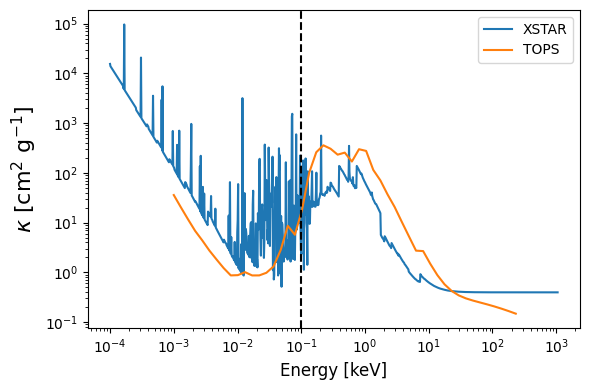

In [62]:
fig=plt.figure(figsize=(6,4)) 

rho=hud[1].data['value'][names=='density']*1.67e-24

plt.plot(hud[3].data['energy']/1000,(hud[3].data['opacity']+hud[3].data['scattering'])/rho,label='XSTAR')
plt.plot(energy[top_ind_temp,top_ind_dens],ross[top_ind_temp,top_ind_dens],label='TOPS')
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')

plt.axvline(0.1,linestyle='dashed',color='black')

plt.xlabel('Energy [keV]',fontsize=12)
plt.ylabel(r'$\kappa$ [cm$^2~$g$^{-1}$]',fontsize=16)
plt.legend()
plt.tight_layout()

#plt.savefig('opex.pdf')

In [63]:
len(hud[3].data['energy'])

999